# Introduction
Hi, my name is Jan Verschueren and I'm a student of the minor Big Data and Design at the Hogeschool Utrecht in Utrecht. In this notebook I will go through the steps of data cleaning and a predictive model. I will explain every step and I used the data from activity trackers, as you can read below.
Good luck!

# Week 1
## Exercise 1
For this exercise, we are going to explore data from activity trackers. Activity trackers are applications that track your activity using your smartphone, a smartwatch, wrist band or a clip-on device. Popular applications include Steps (iPhone), Apple Watch, Fitbit and Jawbone. For a studyLinks to an external site. in France, over 900 volunteers received a Fitbit Zip (a clip-on activity tracker) and recorded their daily steps, distance and calories.
### Step 1: Data cleaning
- Read in and merge the two data sets (tip: think of different CSV formats that exist)
- Clean the data: remove impossible values
- Create the variable mean steps per participant. Hint: combine Pandas .loc and .mean() with the right axis argument (axis=....) for mean(). Look up the documentation of .loc and Pandas .mean() if you're unsure. 
- Show the head() of the resulting data frame

In [446]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import numpy as np
df1 = pd.read_csv(r'D:\Projects\excersice1\survey.csv')
df2 = pd.read_csv(r'D:\Projects\excersice1\steps.csv', sep=";")
df = pd.merge(df1, df2, on = 'id')
print(df.head())

   id         city  gender    age  hh_size  education          education_1  \
0   1     Bordeaux    Male  25-34        4          4  Master or doctorate   
1   2        Lille    Male  35-44        1          3             Bachelor   
2   3  Montpellier    Male  25-34        2          2  Master or doctorate   
3   4         Lyon    Male    <25        1          1             Bachelor   
4   5  Montpellier  Female  25-34        3          4             Bachelor   

   height  weight  20-6-2013  ...  4-5-2014  5-5-2014  6-5-2014  7-5-2014  \
0   178.0    98.0        NaN  ...       NaN       NaN       NaN       NaN   
1   180.0    77.0        NaN  ...       NaN       NaN       NaN       NaN   
2   180.0    83.0        NaN  ...    3914.0    4364.0       NaN       NaN   
3   178.0    80.0        NaN  ...       NaN       NaN       NaN       NaN   
4   167.0    61.0        NaN  ...       NaN       NaN       NaN       NaN   

   8-5-2014  9-5-2014  10-5-2014  11-5-2014  12-5-2014  13-5-2014  


#### Explanation:
Here i'm importing the necessary libaries, so i can use pandas, seaborn and matplotlib. Next i'm storing the pandas read function in a variable/dataframe (df1 and df2) in order to work with this dataset in Python. With df2 i added "sep=";"" to read the properly. After that the two datasets together on the ID column. Then I made a function to filter out weights above 300 and below 40kg, because these numbers are very unlikely. Lastly with "print(df.head())" I showed the first 5 rows of the merged dataset.

### Step 2: Exploratory data analysis
- An analysis of mean steps per participant:
    - Graph of the distribution (e.g., histogram, box plot, density plot, violin plot)
    - Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)
    - Verbal description of the distribution, including commenting on normality, skewness, outliers, etc.
- The relation of mean steps per participant with two categorical variables (e.g. gender, age, education)
    - Graph of the relation (e.g. histograms, box plots, density plots, violin plots). Try a different plot this time.
    - Describe and interpret the results

In [447]:
df['mean'] = df.loc[:, '20-6-2013':'13-5-2014'].mean(axis = 1) #creating a new column with the mean of steps per participant
def above18000 (x): #It's very unlikely that somebody has a average of steps above 25.000, so with the 'def' ever mean above 25.000 will be replaced with 25.000 (decision based on this article: https://www.healthline.com/health/how-many-steps-a-day#Why-10,000-steps?)
    if x > 18000: 
        return float('18000')
    else: 
        return x
df['mean'] = df['mean'].apply(above18000)
def below0(x):
    if x < 0:
        return float('NaN')
    else:
        return x
df['mean'] = df['mean'].apply(below0) 
print(df.head())

   id         city  gender    age  hh_size  education          education_1  \
0   1     Bordeaux    Male  25-34        4          4  Master or doctorate   
1   2        Lille    Male  35-44        1          3             Bachelor   
2   3  Montpellier    Male  25-34        2          2  Master or doctorate   
3   4         Lyon    Male    <25        1          1             Bachelor   
4   5  Montpellier  Female  25-34        3          4             Bachelor   

   height  weight  20-6-2013  ...  5-5-2014  6-5-2014  7-5-2014  8-5-2014  \
0   178.0    98.0        NaN  ...       NaN       NaN       NaN       NaN   
1   180.0    77.0        NaN  ...       NaN       NaN       NaN       NaN   
2   180.0    83.0        NaN  ...    4364.0       NaN       NaN       NaN   
3   178.0    80.0        NaN  ...       NaN       NaN       NaN       NaN   
4   167.0    61.0        NaN  ...       NaN       NaN       NaN       NaN   

   9-5-2014  10-5-2014  11-5-2014  12-5-2014  13-5-2014          mea

#### Explanation:
In the code above I calculated the mean of every ID over the whole time of measure. Then I filtered out the mean of steps above 25.000 (decision based on this article: https://www.healthline.com/health/how-many-steps-a-day#Why-10,000-steps?). Lastly with "print(df.head())" I showed the first 5 rows of the new filtered dataset.

Text(0, 0.5, 'Amount of participants')

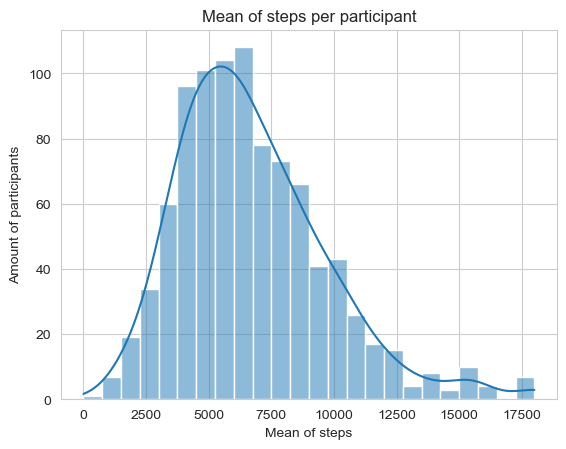

In [448]:
steps = sns.histplot(df['mean'].dropna(), kde=True) #Selecting the mean column. 
steps.set_title('Mean of steps per participant')
steps.set_xlabel('Mean of steps')
steps.set_ylabel('Amount of participants')

- Normality: quite normal 
- Variation: quite a bit 
- Modality: no peaks 
- Skewness: bit right-skewed 
- Outliers: a few

#### Explanation:
In the code above I made a histogram with seaborn. This histograms contains the mean of steps per participant, with axisnames and title. You can see the its normal distributed, there is quite a bit of variation, no peaks, a bit right skewed and a few outliers. The normality, variation and modality are quite clear and obvious, but the skewness is because there are some people in the dataset that are very sportive and take a lot steps every day. That is also why there are a few outliers.

Text(0, 0.5, 'mean of steps')

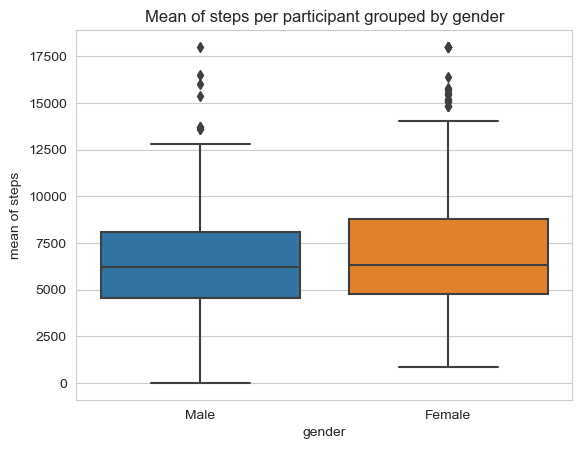

In [449]:
gender = sns.boxplot(x = 'gender', y = 'mean', data = df)
sns.set_style("whitegrid")
gender.set_title('Mean of steps per participant grouped by gender')
gender.set_xlabel('gender')
gender.set_ylabel('mean of steps')

#### Explanation:
With the code above I mode a boxplot with the seaborn libary. This boxplot shows the mean of steps grouped by gender. You can see that with men the median is in the middle of the box, so that means the dataset is equalily divided. The box of men is smaller and that means the data is closer together. The mean of steps are not as spread as with women and are a little bit lower. The outliers are lower too. With women, you see that the median is not in the middle of the box, so the upper quartile is bigger. That means that the mean is higher than the median.That means it's positively skewed and there are more extreme values, which is in line with the amount of high outliers.

Text(0, 0.5, 'education')

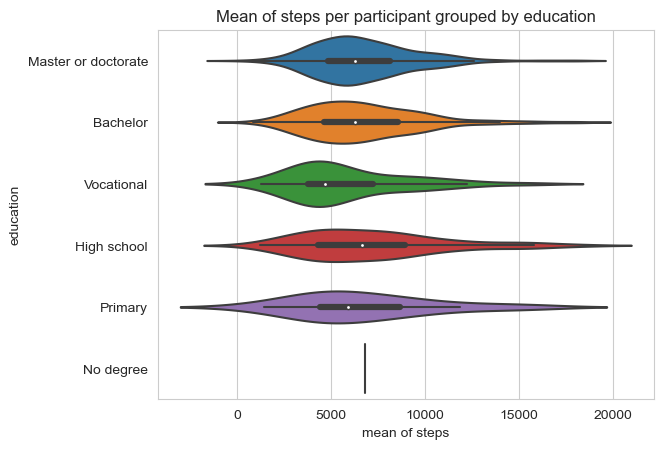

In [450]:
education = sns.violinplot(data = df, x = "mean", y = "education_1")
sns.set_style("whitegrid")
education.set_title('Mean of steps per participant grouped by education')
education.set_xlabel('mean of steps')
education.set_ylabel('education')

#### Explanation:
Lastly I made this violinplot. It works almost the same as a boxplot, but a violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. You can also see clear what the density of the data is. People with Vocational education have the highest density and high school the lowest. It's not really clear for me why certain educations are more dense than other, but most of them has high outliers.

# Week 2
## Excersice 2
In this exercise, you will learn apply correlation and linear regression to the Fitbit dataset from week 1. 
### Step 1: Exploratory data analysis
- See week 1 for the first part
- Make scatter plots for the relations 
- Calculate the correlation
- Describe and interpret the results

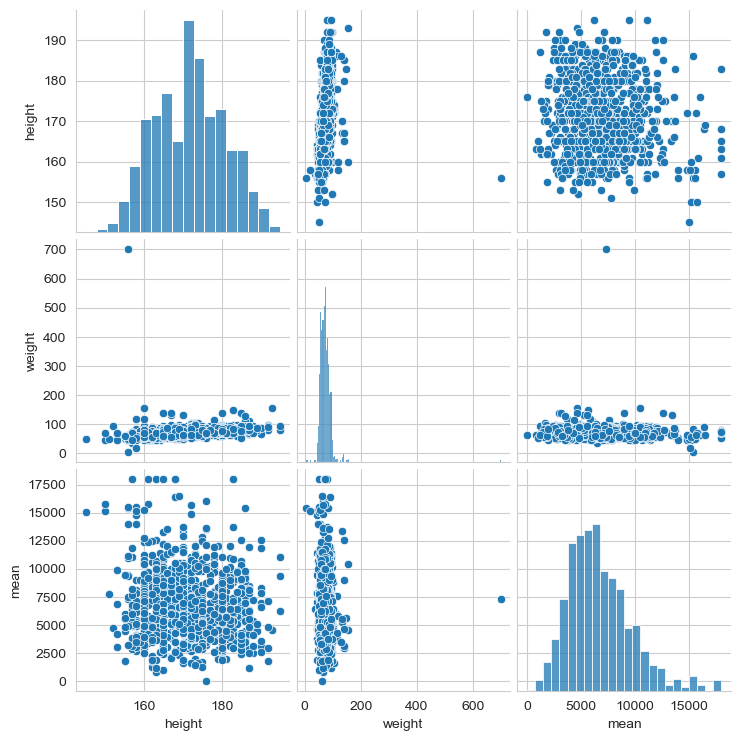

In [451]:
df_subset=df[['height', 'weight', 'mean']]
sns.pairplot(df_subset)
plt.show() #using Matplotlib to show the plot

#### Explanation:
I made a subset with the columns: weight, height and mean. These are numerical values that are useful to make scatterplots. But as you can see, there is no correlation between these columns.

In [452]:
df_subset.corr()

,height,weight,mean
height,1.000000,0.265138,-0.096048
weight,0.265138,1.000000,-0.047156
mean,-0.096048,-0.047156,1.000000


#### Explanation:
With this line of code you can calculate the correlation for the subset. Perfect correlation is -1 or 1, so you can see that none of them are correlated with each other.

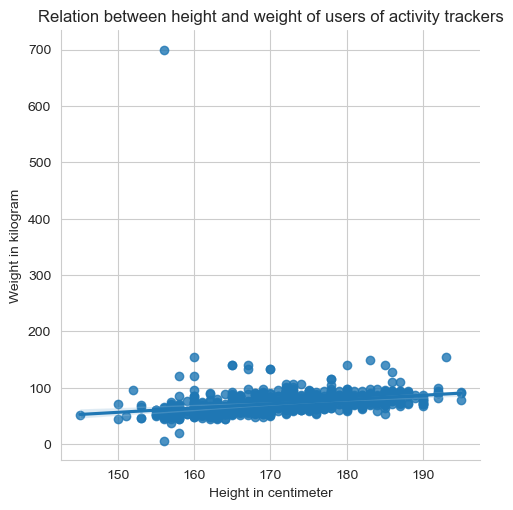

In [453]:
sns.lmplot(x='height', y='weight', fit_reg=True, data=df_subset) #fit_reg=False leaves out the regression line
plt.xlabel('Height in centimeter') #use matplotlib to refine Seaborn plot
plt.ylabel('Weight in kilogram')
plt.title('Relation between height and weight of users of activity trackers')
plt.show()

#### Explanation:
With this code I made a lmplot to see the correlation between the height and weight. Now you can see even more clear that there is no correlation and that there are much outliers.

### Step 2: Predictive model
- Explain linear regression in your own words
- Fit a linear regression model to predict the mean steps per participant, using the training data. 
- Extra challenge: see if you can find out how to include the categorical variables, such as gender.

#### Linear regression
Linear regression shows how much two variables are correlated to each other. -1 or 1 are perfect correlations, but almost never exist. The closer to -1 or 1, the stronger the correlation is and the better you can predict certain values.

In [454]:
import seaborn as sns
import sklearn as sk #this is the most popular library for statistics and machine learning
import pandas as pd
import matplotlib.pyplot as plt
df['gender'].replace(['Male', 'Female'], [0,1], inplace=True)

#### Explanation:
Here I'm replacing strings with floats to add them to my prediction model.

In [455]:
df_subset1 = df[['gender', 'weight', 'height', 'mean']]
df2 = df_subset1.dropna()

#### Explanation:
With the lines above I made a subset and deleted all the NaN. 

In [456]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df2[['gender', 'weight', 'height']] 
y = df2[['mean']]
lm = LinearRegression() #this creates a new LR model
lm = lm.fit(x, y) #this "fits" the model

plt.show()

#### Explanation: 
This code will create a linear regression model. It doesn't show anything, but there is a progress on the background. With the next steps, I will use this model to create a predictive model.

In [457]:
df2['mean_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df2.head(10)

C:\Users\janve\AppData\Local\Temp\ipykernel_4740\1314419579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['mean_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe


,gender,weight,height,mean,mean_p
0,0,98.0,178.0,10205.521212,6461.142092
1,0,77.0,180.0,5687.423313,6466.129811
2,0,83.0,180.0,8301.729730,6450.831836
3,0,80.0,178.0,3633.200000,6507.036018
4,1,61.0,167.0,5312.129630,6963.284317
5,0,63.0,170.0,11908.509804,6744.601058
6,0,75.0,175.0,4715.400000,6592.617122
7,1,88.0,165.0,3594.051724,6942.998624
8,1,69.0,172.0,8626.707965,6821.499031
9,1,93.0,165.0,3787.043478,6930.250311


#### Explanation:
With lm.predict you can generate predictions on different columns and store it in the original dataframe. With this function, I created a prediction of the mean, with the built-in method.

In [458]:
from sklearn.metrics import r2_score #we need this function from sklearn
r2_score(df2['mean'], df2['mean_p'])

0.010031150480910633

#### Explanation:
With r2_score you can calculate the (coefficient of determination (1 is your goal). This tells you how accurate your prediction is. Only 1% accuracy is extremely low and that means that this predictive model is not usable to predict the mean.

In [459]:
from sklearn.metrics import mean_squared_error #we need this function from sklearn
from math import sqrt #we need the square root from the math library

sqrt(mean_squared_error(df2['mean'], df2['mean_p']))

2978.9423687159474

#### Explanation:
with sqrt you calculate how much your prediction model is off from the measured value. The lower the better. In this context the sqrt is pretty high. It is in line with the 1% accuracy. It means that the model will be off with 3000 steps. That could mean that it would be off with 1.5 times the real mean of steps.

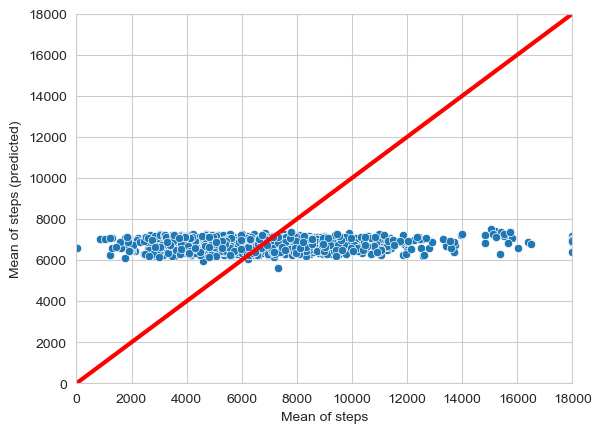

In [460]:
sns.scatterplot(x='mean',y='mean_p',data=df2)
plt.xlim(0, 18000) #This sets the x-axis limits to (0, 25000)
plt.ylim(0, 18000) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 18000], [0,18000], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('Mean of steps')
plt.ylabel('Mean of steps (predicted)')
plt.show()

#### Explanation:
Everything is calculated and with this last bit of code I made a scatterplot to show how good the prediction model is that I created. How closer the dots are to the red line, the more accurate the prediction model is. What I explained before about the 1% accuracy and 3000 steps off, is now clear in this latest scatterplot that is generated. There are a few dots close and on the red line, but almost all the dots are far away from it. This once again shows how inaccurate the predictive model is.

### Step 3: Evaluation
- Evaluate the model
- Predictive power of the model (R2, RMSE)
- Investigate the Y-Y' plot
- Describe and interpret the results

#### Evaluation
With the dataset, the predictive power of the model is really bad, because of the 1% accuracy. This is also something you can see in the Y-Y'plot. Almost no dots are on the red line, so almost no values are correctly predicted. The results are what I thought of when I completed the data analysis. I saw that the highest correlation 0,26 was between height and weight. That is a weak correlation and the other variables were even weaker. So my hypotheses was that the model would not be usable to predict the mean of steps.

### Step 4: Conclusion
If I could make it work and put more variables in it, with stronger correlation, it would be a more accurate predicitve model. But with this dataset it would always be a bad predictive model based on the low correlations there are.